# Boston Criminality

In [1]:
# Useful import for data collection
import sqlite3

# Useful imports for data manipulation and analysis
import numpy as np
import pandas as pd

# Useful imports for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Useful imports to estimate regression models
import statsmodels.formula.api as smf

In [2]:
# Run this cell to download the datasets in the data directory
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/incident_reports.csv > data/incident_reports.csv   
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/districts.csv > data/districts.csv    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.1M  100 19.1M    0     0  5809k      0  0:00:03  0:00:03 --:--:-- 5807k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   498  100   498    0     0   2477      0 --:--:-- --:--:-- --:--:--  2477


In [3]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [4]:
def max_seria(seria):
    return seria.mode()
offense_incidents = data.groupby(['NAME']).agg({'OFFENSE_CODE_GROUP': [max_seria]})
offense_incidents.columns = ['OFFENSE_CODE_GROUP']

In [6]:
# YOUR CODE HERE
incident_per_city = pd.pivot_table(data, values='INCIDENT_NUMBER', index=['OFFENSE_CODE_GROUP'], columns = 'NAME',aggfunc='count')

In [7]:
incident_per_city

NAME,Brighton,Charlestown,Dorchester,Downtown,East Boston,Hyde Park,Jamaica Plain,Mattapan,Roxbury,South Boston,South End,West Roxbury
OFFENSE_CODE_GROUP,,,,,,,,,,,,
Disputes,563,200,3066,254,597,1147,619,3573,3450,596,759,597
Drugs and disorderly conduct,809,416,2587,2510,995,853,1136,1897,3040,1867,2191,721
Fraud and law violations,1807,428,3705,3245,1055,1395,1358,2971,4820,1654,3195,1168
Larceny and vandalism,5274,1671,9230,9256,2911,3517,4546,6598,10471,5637,14012,2915
Other,925,338,2792,2034,883,1082,1096,2381,3571,1327,2090,880
Police investigation procedure,2783,1162,7428,5464,1941,2998,2614,7001,8030,3523,5540,2036
Violence and harassment,1627,550,4067,3497,1309,1559,1433,3910,5495,2013,3471,1089


In [9]:
offense_incidents.reset_index(inplace=True)

In [10]:
offense_incidents

,NAME,OFFENSE_CODE_GROUP
0,Brighton,Larceny and vandalism
1,Charlestown,Larceny and vandalism
2,Dorchester,Larceny and vandalism
3,Downtown,Larceny and vandalism
4,East Boston,Larceny and vandalism
5,Hyde Park,Larceny and vandalism
6,Jamaica Plain,Larceny and vandalism
7,Mattapan,Police investigation procedure
8,Roxbury,Larceny and vandalism
9,South Boston,Larceny and vandalism


In [11]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


## What Kind of incidents ?

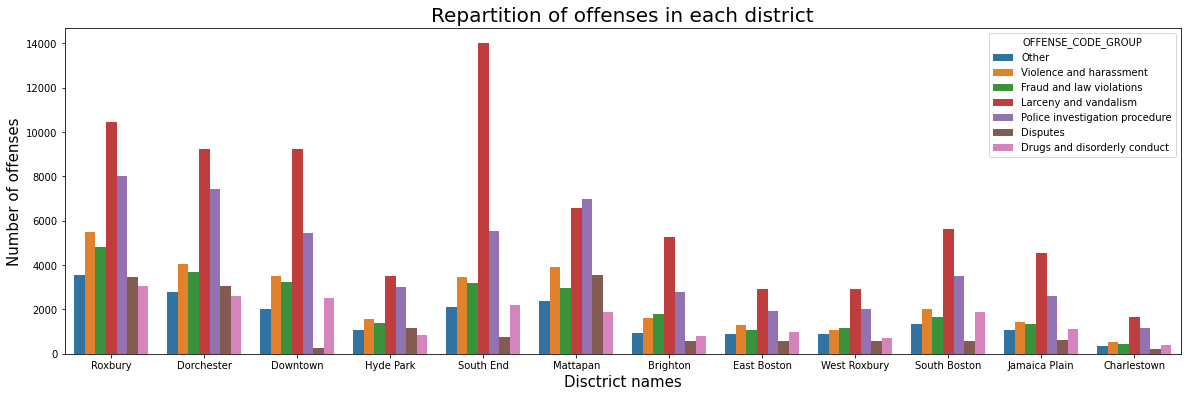

In [74]:
fig = plt.figure(figsize=(20,6))
sns.countplot(x='NAME',hue="OFFENSE_CODE_GROUP", data=data)
plt.title("Repartition of offenses in each district",fontsize=20)
plt.ylabel("Number of offenses",fontsize=15)
plt.xlabel("Disctrict names",fontsize=15);

### **We can see that larcency and vandalism are the main incidents in almost all the districts.**

In [20]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [21]:
# YOUR CODE HERE
data['distance_police_incident']=data.apply(lambda x:haversine_distance(x['LONG'],x['LAT'],x['LONG_POLICE_STATION'],x['LAT_POLICE_STATION']),axis=1)

# YOUR CODE HERE
distance_police_incident = data.groupby("NAME")[['distance_police_incident']].mean()
distance_police_incident

,distance_police_incident
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


In [22]:
data2 = pd.read_csv('data/boston_crimes_regression.csv')

In [29]:
data2.head()

,MEDIAN_AGE,TOTAL_POP,PERC_OF_30_34,PERC_MARRIED_COUPLE_FAMILY,PER_CAPITA_INCOME,PERC_OTHER_STATE_OR_ABROAD,PERC_LESS_THAN_HIGH_SCHOOL,PERC_COLLEGE_GRADUATES,CODE,NB_INCIDENTS,NAME
0,30.8,55297,52.8,26.4,41261,8.6,6.7,10.5,D14,13788,Brighton
1,35.7,19890,28.2,36.4,75339,3.4,7.9,8.2,A15,4765,Charlestown
2,33.4,126909,28.2,26.6,29767,2.4,18.0,17.1,C11,32875,Dorchester
3,33.5,18306,32.5,35.8,80057,14.8,15.4,6.9,A1,26260,Downtown
4,30.6,47263,31.1,30.4,31473,3.5,27.2,11.5,A7,9691,East Boston


In [30]:
relation_distance_incidents = distance_police_incident.merge(data2[['NAME','NB_INCIDENTS']],on='NAME',how='outer')

In [33]:
relation_distance_incidents

,NAME,distance_police_incident,NB_INCIDENTS
0,Brighton,3.770867,13788
1,Charlestown,58.758394,4765
2,Dorchester,3.174444,32875
3,Downtown,6.336657,26260
4,East Boston,5.568626,9691
5,Hyde Park,2.397613,12551
6,Jamaica Plain,2.585737,12802
7,Mattapan,1.908636,28331
8,Roxbury,2.989029,38877
9,South Boston,31.454220,16617


## Are there police station enough for each district ?

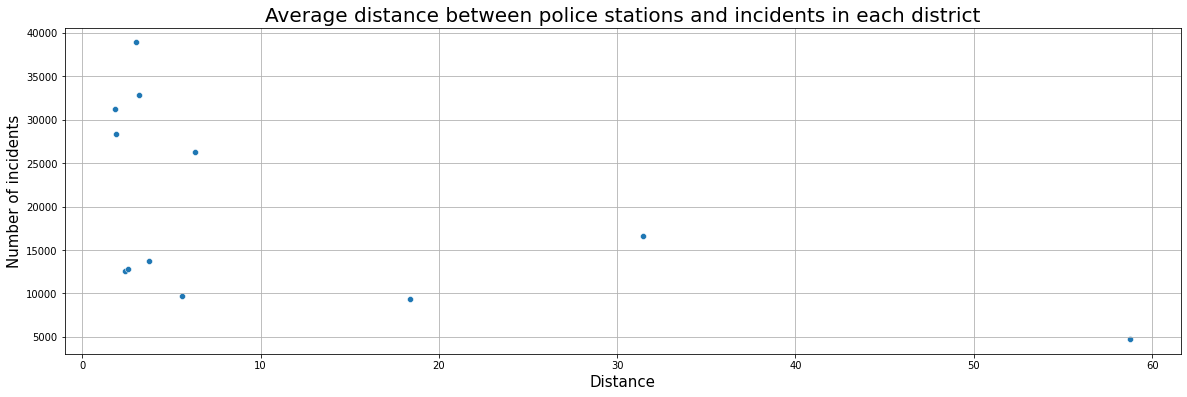

In [77]:
fig = plt.figure(figsize=(20,6))
ax = plt.gca()
ax.grid(True)
sns.scatterplot(x='distance_police_incident',y='NB_INCIDENTS',data=relation_distance_incidents)
plt.title("Average distance between police stations and incidents in each district",fontsize=20)
plt.xlabel('Distance',fontsize = 15)
plt.ylabel('Number of incidents',fontsize = 15);

### **It seems that the distance between the incident and the police station has no significant effect.**

## Regarding families

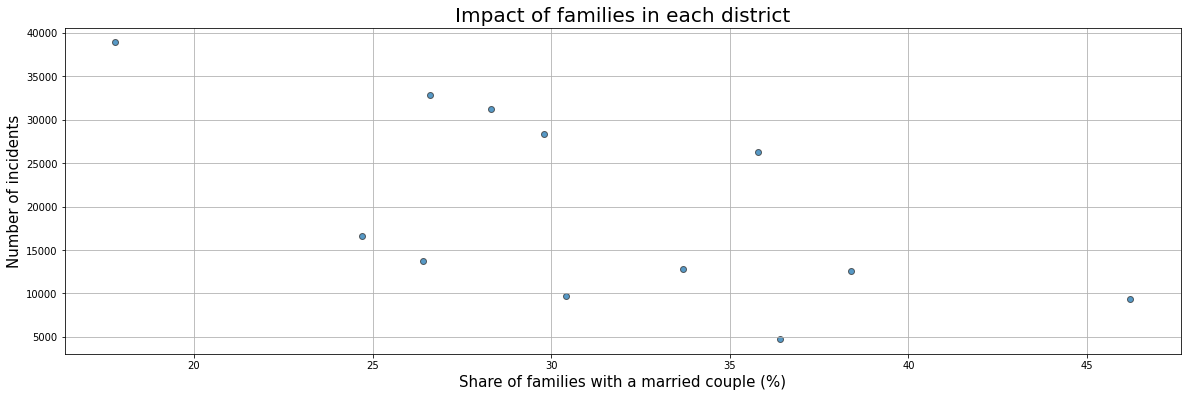

In [78]:
fig = plt.figure(figsize=(20,6))
ax = plt.gca()
ax.grid(True)
plt.scatter(data2['PERC_MARRIED_COUPLE_FAMILY'], data2['NB_INCIDENTS'], edgecolor='#333333', alpha=0.75)
plt.title('Impact of families in each district',fontsize=20)
plt.ylabel('Number of incidents',fontsize=15)
plt.xlabel('Share of families with a married couple (%)',fontsize=15);

### **We can see a relation between the share of families with a married couple and the number of incidents. Indeed, more the share is important, less there are incidents.**

In [79]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,distance_police_incident
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_NUMBER           237221 non-null  object 
 1   OFFENSE_CODE_GROUP        237221 non-null  object 
 2   SHOOTING                  237221 non-null  int64  
 3   OCCURRED_ON_DATE          237221 non-null  object 
 4   LAT                       237221 non-null  float64
 5   LONG                      237221 non-null  float64
 6   NAME                      237221 non-null  object 
 7   LAT_POLICE_STATION        237221 non-null  float64
 8   LONG_POLICE_STATION       237221 non-null  float64
 9   distance_police_incident  237221 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 28.0+ MB


In [82]:
data['OCCURRED_ON_DATE']=pd.to_datetime(data['OCCURRED_ON_DATE'])

In [84]:
data.set_index('OCCURRED_ON_DATE',inplace=True)

In [88]:
time_data = data.resample('M').count()

In [90]:
time_data

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,distance_police_incident
OCCURRED_ON_DATE,,,,,,,,,
2015-06-30,3090,3090,3090,3090,3090,3090,3090,3090,3090
2015-07-31,6148,6148,6148,6148,6148,6148,6148,6148,6148
2015-08-31,6072,6072,6072,6072,6072,6072,6072,6072,6072
2015-09-30,5998,5998,5998,5998,5998,5998,5998,5998,5998
2015-10-31,5955,5955,5955,5955,5955,5955,5955,5955,5955
2015-11-30,5629,5629,5629,5629,5629,5629,5629,5629,5629
2015-12-31,5615,5615,5615,5615,5615,5615,5615,5615,5615
2016-01-31,5537,5537,5537,5537,5537,5537,5537,5537,5537
2016-02-29,5011,5011,5011,5011,5011,5011,5011,5011,5011


## Regarding Temporality

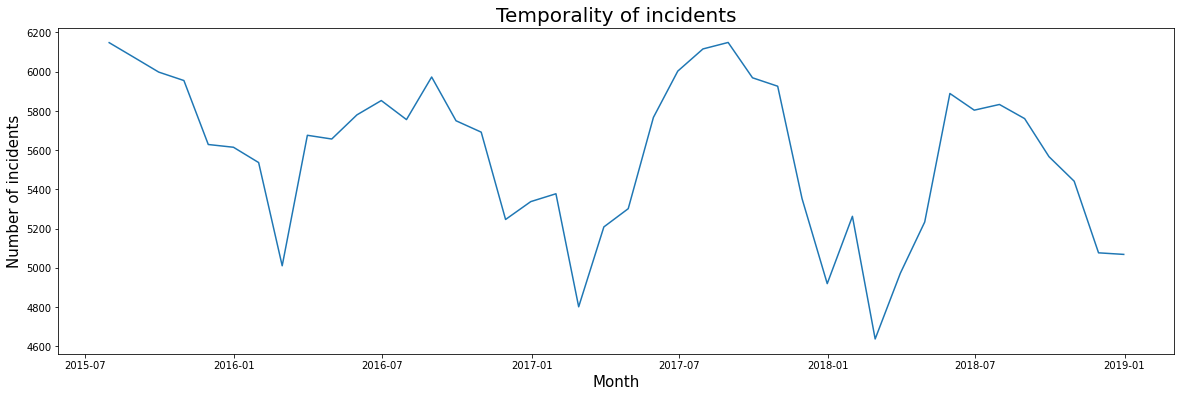

In [94]:
fig = plt.figure(figsize=(20,6))
plt.plot(time_data.index[1:],time_data.INCIDENT_NUMBER[1:])
plt.title("Temporality of incidents",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Number of incidents",fontsize=15);

### We can see a distinct repetition by year. It might be interesting to dig this point in order to know what is the origin of this phenomenon. Summer and winter seem to be the reasons of this trend.

# CONCLUSION :

- **Larcency and vandalism are the main incidents in almost all the districts.**
- **It seems that families can help to decrease incidents.**
- **Distance between police stations and incidents has no effect. The problem is not about the repartition of police stations.**
- **Seasons impact the number of incidents.**